# Pergunta escolhida:

'O crescimento da industrialização e os investimentos internos estão associados a um IDH alto?'

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

hdi = pd.read_excel("hdi_human_development_index.xlsx")
hdi_loc = hdi.loc[:, ['geo', 1990]]
industry = pd.read_excel("industry_percent_of_gdp.xlsx")
industry_loc = industry.loc[:, ['geo', 1990]]
invest = pd.read_excel("foreign_direct_investment_net_inflows_percent_of_gdp.xlsx")
invest_loc = invest.loc[:, ['geo', 1990]]

In [2]:
hdi_loc.tail(20)

,geo,1990
167,Timor-Leste,NaN
168,Togo,0.404
169,Tonga,0.648
170,Trinidad and Tobago,0.670
171,Tunisia,0.569
172,Turkey,0.576
173,Turkmenistan,NaN
174,Uganda,0.309
175,Ukraine,0.706
176,United Arab Emirates,0.726


In [3]:
hdi_idx = hdi_loc.set_index("geo")

In [4]:
industry_loc.head()

,geo,1990
0,Afghanistan,NaN
1,Albania,48.2
2,Algeria,48.2
3,Andorra,NaN
4,Angola,33.3


In [5]:
industry_idx = industry_loc.set_index("geo")

In [6]:
invest_loc.tail()

,geo,1990
183,Venezuela,0.959
184,Vietnam,2.780
185,Yemen,-2.320
186,Zambia,6.170
187,Zimbabwe,-0.139


In [7]:
invest_idx = invest_loc.set_index("geo")

In [8]:
join_1 = hdi_idx.join(industry_idx, how='inner', lsuffix = '_hdi', rsuffix = '_industry')

In [9]:
join_1.head()

,1990_hdi,1990_industry
geo,,
Afghanistan,0.295,NaN
Albania,0.635,48.2
Algeria,0.577,48.2
Andorra,NaN,NaN
Angola,NaN,33.3


In [10]:
join_1.columns.tolist()

['1990_hdi', '1990_industry']

In [11]:
invest_idx.rename(columns=str, inplace=True)

In [12]:
invest_idx.columns.tolist()

invest_idx.rename(columns={'1990':'1990_investments'}, inplace=True)

invest_idx.head()

,1990_investments
geo,
Afghanistan,NaN
Albania,NaN
Algeria,0.00054
Angola,-3.34000
Antigua and Barbuda,13.20000


In [13]:
join_2 = join_1.join(invest_idx, how='inner', lsuffix = '_investment in')

In [14]:
join_2 = join_2.dropna()
join_2.head()

,1990_hdi,1990_industry,1990_investments
geo,,,
Algeria,0.577,48.2,0.00054
Argentina,0.705,36.0,1.30000
Australia,0.866,31.3,2.60000
Austria,0.794,33.3,0.39200
Bangladesh,0.386,20.7,0.01030


In [15]:
join_2["1990_investments"].describe()

count    88.000000
mean      1.395305
std       2.157608
min      -2.320000
25%       0.214000
50%       0.812500
75%       1.992500
max      15.400000
Name: 1990_investments, dtype: float64

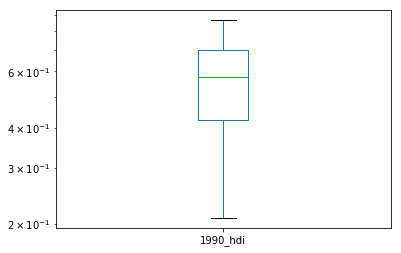

In [16]:
join_2["1990_hdi"].plot.box(logy=True);

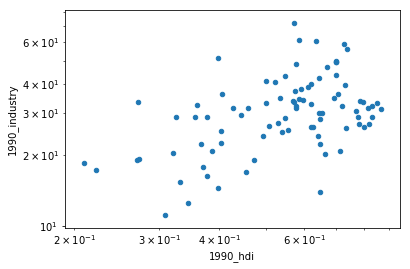

In [17]:
join_2.plot.scatter(x = "1990_hdi", y = "1990_industry", loglog = True)

In [18]:
join_2

,1990_hdi,1990_industry,1990_investments
geo,,,
Algeria,0.577,48.2,0.00054
Argentina,0.705,36.0,1.30000
Australia,0.866,31.3,2.60000
Austria,0.794,33.3,0.39200
Bangladesh,0.386,20.7,0.01030
Barbados,0.714,20.8,0.55400
Belize,0.648,22.2,4.16000
Benin,0.345,12.5,3.18000
Bolivia,0.535,34.8,0.55900


In [32]:
join_1.head(70)

,1990_hdi,1990_industry
geo,,
Albania,0.635,48.2
Algeria,0.577,48.2
Argentina,0.705,36.0
Armenia,0.634,52.0
Australia,0.866,31.3
Austria,0.794,33.3
Bangladesh,0.386,20.7
Barbados,0.714,20.8
Belize,0.648,22.2


Ajuste linear entre X3 e X4:
Coeficiente linear: 15.339384511235526
Coeficiente angular: 30.300653415127243


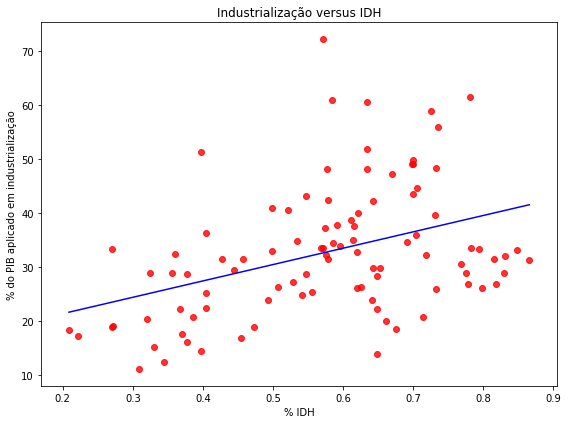

In [27]:
def reta(dados_x, dados_y):    
    a = dados_y.cov(dados_x) / dados_x.var()
    b = dados_y.mean() - a*dados_x.mean()
 
    print('Ajuste linear entre X3 e X4:')
    print('Coeficiente linear:', b)
    print('Coeficiente angular:', a)
 
    fig = plt.figure(figsize=(8, 6))
    plt.scatter(dados_x, dados_y, c='red', alpha=0.8)
    plt.title('Industrialização versus IDH')
    plt.xlabel('% IDH')
    plt.ylabel('% do PIB aplicado em industrialização')
 
    plt.plot((dados_x.min(), dados_x.max()), (a*dados_x.min()+b, a*dados_x.max()+b), color='blue')
 
    plt.tight_layout()
    plt.show()
    
join_1 = join_1.dropna()
    
dados_x = join_1["1990_hdi"]
dados_y = join_1["1990_industry"]

reta(dados_x, dados_y)

#invest_idx.describe()

Ajuste linear entre X3 e X4:
Coeficiente linear: 0.04029114894617902
Coeficiente angular: 2.397531092645747


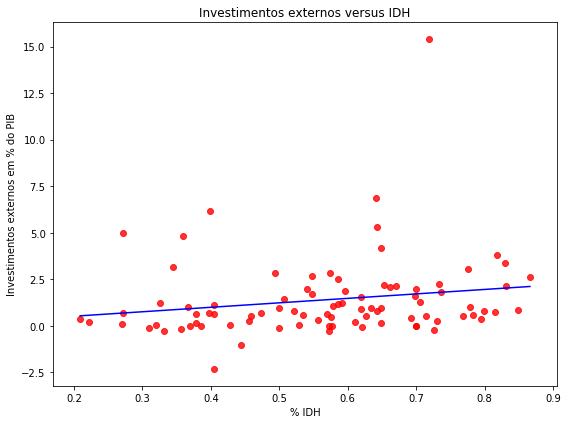

In [28]:
def reta(dados_x, dados_y):    
    a = dados_y.cov(dados_x) / dados_x.var()
    b = dados_y.mean() - a*dados_x.mean()
 
    print('Ajuste linear entre X3 e X4:')
    print('Coeficiente linear:', b)
    print('Coeficiente angular:', a)
 
    fig = plt.figure(figsize=(8, 6))
    plt.scatter(dados_x, dados_y, c='red', alpha=0.8)
    plt.title('Investimentos externos versus IDH')
    plt.xlabel('% IDH')
    plt.ylabel('Investimentos externos em % do PIB')
 
    plt.plot((dados_x.min(), dados_x.max()), (a*dados_x.min()+b, a*dados_x.max()+b), color='blue')
 
    plt.tight_layout()
    plt.show()



    


dados_x = join_2["1990_hdi"]
dados_y = join_2["1990_investments"]

reta(dados_x, dados_y)

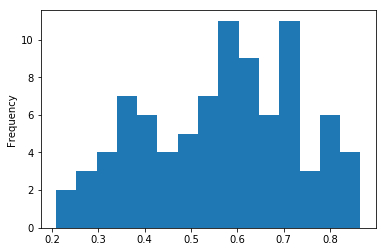

In [22]:
join_2["1990_hdi"].plot.hist(bins=15)

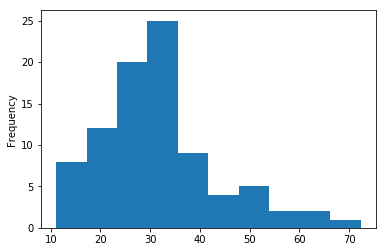

In [23]:
join_2["1990_industry"].plot.hist()

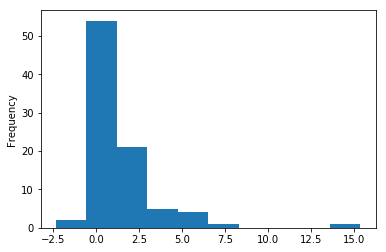

In [24]:
join_2["1990_investments"].plot.hist()

# Conclusão:

Com base na análise dos dados do primeiro gráfico scatter (industrialização versus IDH), percebemos uma certa correlação, principalmente no meio do gráfico. Ainda assim, não há um certo padrão, visto que muitos pontos (países) estão abaixo do meio, não tendo tanta relação portanto, entre os investimentos em industrialização e o aumento do IDH. Porém, alguns outros possuem uma alta correlação, associando-se fortemente. Uma relação curiosa foi percebida, pois países desenvolvidos apresentaram alto IDH e industrialização abaixo de 50 % do PIB. Já alguns países subdesenvolvidos apresentaram baixo IDH e industrialização acima de 50 % do PIB. 

Já na análise dos dados do segundo gráfico scatter (investimentos externos versus IDH), percebemos uma certa linearidade nos dados, pois a maioria ficou abaixo do meio do gráfico, variando entre aproximadamente 20% e 85 % do IDH e na faixa de 0.25 e 4% de investimentos externos do PIB. Porém há um ponto (país) em particular que se destaca dos demais no gráfico, apresentando altos índices de investimentos externos (cerca de 15% do PIB) e de IDH (70% do IDH). Este ponto foi analisado e descobriu-se que se trata do país Singapura e, além disso, condiz bastante com a realidade, pois está no bloco dos Tigres Asiáticos, ou seja, países asiáticos que realizaram massivos investimentos em educação e atração de empresas e indústrias multinacionais. 